In [86]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import hvplot.pandas


In [87]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [88]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [89]:
market_data_df.columns

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [90]:

# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
market_data_df_scaled = StandardScaler().fit_transform(market_data_df[['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y']])


In [91]:
# Create a DataFrame with the scaled data
scaled_columns = ['price_change_percentage_24h', 'price_change_percentage_7d',
                  'price_change_percentage_14d', 'price_change_percentage_30d',
                  'price_change_percentage_60d', 'price_change_percentage_200d',
                  'price_change_percentage_1y']
market_data_df_scaled = pd.DataFrame(market_data_df_scaled, columns=scaled_columns)

# Copy the crypto names from the original data
market_data_df_scaled['coin_id'] = market_data_df.index

# Set the coinid column as index
market_data_df_scaled.set_index('coin_id', inplace=True)

# Display sample data
market_data_df_scaled.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [92]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 12))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Inside the loop:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, n_init='auto', random_state=1)

    # 2. Fit the model to the data using the scaled DataFrame
    kmeans.fit(market_data_df_scaled)

    # 3. Append the model.inertia_ to the inertia list
    inertia.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
print(df_elbow)

     k     inertia
0    1  287.000000
1    2  212.123342
2    3  165.136752
3    4   79.022435
4    5   66.413051
5    6   61.634088
6    7   46.074467
7    8   43.392694
8    9   32.913223
9   10   30.469111
10  11   26.480101


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

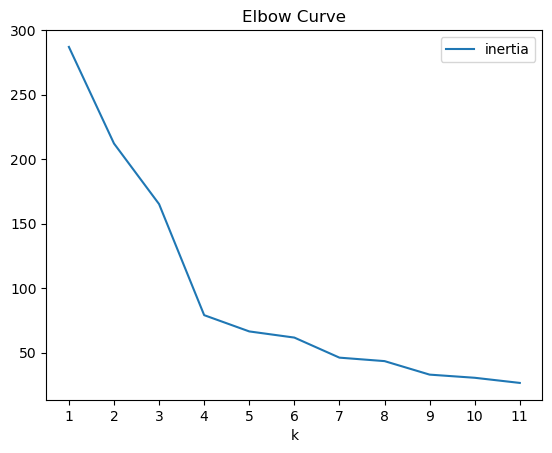

In [93]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.plot.line(
    x="k",
    y="inertia",
    title="Elbow Curve",
    xticks=k_values
)

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** As per taught by Professor... the "elbow" point, where the curve bends most significantly, appears to be at k = 4.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [94]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, n_init='auto', random_state=0)

In [95]:
# Fit the K-Means model using the scaled data
model.fit(market_data_df_scaled)

KMeans(n_clusters=4, random_state=0)

In [96]:
# Predict the clusters to group the cryptocurrencies using the scaled data
k_4= model.predict(market_data_df_scaled)

# View the resulting array of cluster values.
print(k_4)

[2 2 0 0 2 2 2 2 2 0 0 0 0 2 0 2 0 0 2 0 0 2 0 0 0 0 0 0 2 0 0 0 1 2 0 0 3
 0 0 0 0]


In [97]:
# Create a copy of the DataFrame
df_copy = market_data_df_scaled.copy()

In [98]:
# Add a new column to the DataFrame with the predicted clusters
df_copy['Clusters'] = k_4

# Display sample data
df_copy.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,2
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,2
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,2


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

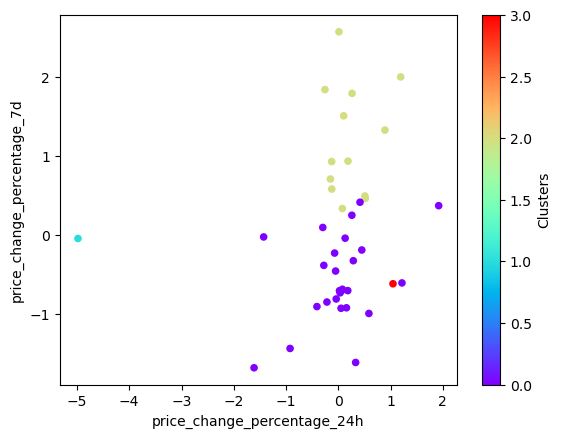

In [99]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
df_copy.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c='Clusters', 
    colormap='rainbow'
)

### Optimize Clusters with Principal Component Analysis.

In [100]:
# Create a PCA model instance and set `n_components=3`.
pca_model = PCA(n_components=3)

In [101]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_data = pca_model.fit_transform(market_data_df_scaled)

# Convert the PCA data to a DataFrame
pca_df = pd.DataFrame(data=pca_data, columns=['PCA1', 'PCA2', 'PCA3'])

# View the first five rows of the DataFrame. 
pca_df.head()

,PCA1,PCA2,PCA3
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [102]:
# Retrieve the explained variance to determine how much information can be attributed to each principal component.
explained_variance = pca_model.explained_variance_ratio_
print(explained_variance)

[0.3719856  0.34700813 0.17603793]


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** Adding these together:
[ 37.20 + 34.70 + 17.60 = 89.50% ]
This means that the three principal components together explain approximately 89.50% of the total variance in the dataset.
When the explained variance is close to 100%, it indicates that the selected principal components capture most of the important information in the data. This suggests that dimensionality of dataset can be effectively reduced while retaining a significant amount of its original variability. In practical terms, this means that using these three principal components should provide a good representation of the data for further analysis or modeling.

In [103]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
pca_final_df = pd.DataFrame(data=pca_data, columns=['PCA1', 'PCA2', 'PCA3'])

# Copy the crypto names from the original data
pca_final_df['coin_id'] = market_data_df_scaled.index.values

# Set the coinid column as index
pca_final_df.set_index('coin_id', inplace=True)

# Display sample data
pca_final_df.head()

,PCA1,PCA2,PCA3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [104]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Inside the loop:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)

    # 2. Fit the model to the data using PCA DataFrame.
    kmeans.fit(pca_final_df[['PCA1', 'PCA2', 'PCA3']])

    # 3. Append the model.inertia_ to the inertia list
    inertia.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
elbow_df.head(10)

,k,inertia
0,1,256.874086
1,2,182.339530
2,3,140.431833
3,4,49.665497
4,5,42.051901
5,6,31.749005
6,7,28.031869
7,8,19.451747
8,9,13.814082
9,10,10.630648


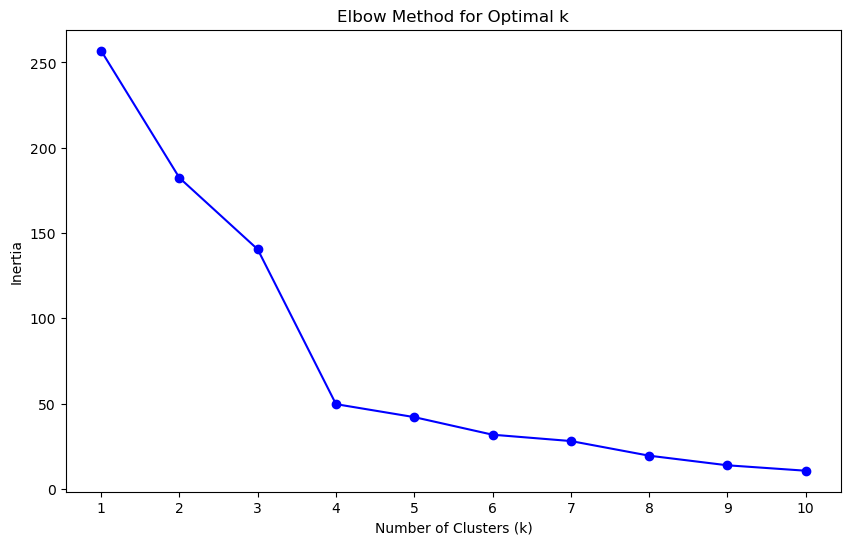

In [105]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.

# Create a list with the number of k-values to try
k_values = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    
    # Fit the model to the data using PCA DataFrame.
    kmeans.fit(pca_final_df[['PCA1', 'PCA2', 'PCA3']])
    
    # Append the model.inertia_ to the inertia list
    inertia.append(kmeans.inertia_)

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame({'k': k_values, 'inertia': inertia})

# Plot a line chart with all the inertia values
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(elbow_df['k'])
plt.show()  # Display the plot

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** The best value for 'k' when using the PCA data is 4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** They are the same.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [106]:
# Initialize the K-Means model using the best value for k
model_pca = KMeans(n_clusters=4, random_state=42)

In [107]:
# Fit the K-Means model using the PCA data
model_pca.fit(pca_final_df[['PCA1', 'PCA2', 'PCA3']])

KMeans(n_clusters=4, random_state=42)

In [108]:
# Predict the clusters to group the cryptocurrencies using the PCA data
pca_clusters = model_pca.predict(pca_final_df[['PCA1', 'PCA2', 'PCA3']])

# Add the predicted clusters to the PCA DataFrame
pca_final_df['Clusters'] = pca_clusters

# Print the resulting array of cluster values.
pca_final_df.head()

,PCA1,PCA2,PCA3,Clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [109]:
# Create a copy of the DataFrame with the PCA data
pca_copy_df = pca_final_df.copy()


# Display sample data
pca_copy_df.head()

,PCA1,PCA2,PCA3,Clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0


In [114]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
scatter_plot = pca_copy_df.hvplot.scatter(
    x='PCA1',
    y='PCA2',
    c='Clusters',  # Color by the cluster assignments
    cmap='rainbow',  # Use a colormap for better visualization
    title='PCA Scatter Plot of Cryptocurrencies',
    xlabel='PCA1',
    ylabel='PCA2',
    size=100  # Adjust the size of the points
)

# Display the plot
scatter_plot

:Scatter   [PCA1]   (PCA2,Clusters)

### Determine the Weights of Each Feature on each Principal Component

In [112]:
# Use the columns from the original scaled DataFrame as the index.
pca_copy_df.head()

,PCA1,PCA2,PCA3,Clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,0
ethereum,-0.458261,0.458466,0.952877,0
tether,-0.433070,-0.168126,-0.641752,2
ripple,-0.471835,-0.222660,-0.479053,2
bitcoin-cash,-1.157800,2.041209,1.859715,0


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** See below
    

In [113]:
pca_component_weights = pd.DataFrame(pca_model.components_, columns=market_data_df_scaled.columns)

# Display the component weights
print(pca_component_weights)

# Identify the strongest positive and negative influences for each component
for i in range(pca_component_weights.shape[0]):
    print(f"Principal Component {i + 1}:")
    print("Strongest Positive Influence:")
    print(pca_component_weights.iloc[i].nlargest(1))  # Top positive influence
    print("Strongest Negative Influence:")
    print(pca_component_weights.iloc[i].nsmallest(1))  # Top negative influence
    print("\n")

   price_change_percentage_24h  price_change_percentage_7d  \
0                    -0.416728                   -0.102432   
1                     0.358162                    0.227432   
2                    -0.218795                    0.787670   

   price_change_percentage_14d  price_change_percentage_30d  \
0                    -0.009162                     0.191523   
1                     0.540415                     0.562182   
2                     0.349534                    -0.181744   

   price_change_percentage_60d  price_change_percentage_200d  \
0                     0.320365                      0.594468   
1                     0.434040                      0.027735   
2                    -0.361377                      0.039733   

   price_change_percentage_1y  
0                    0.568379  
1                   -0.150789  
2                    0.210541  
Principal Component 1:
Strongest Positive Influence:
price_change_percentage_200d    0.594468
Name: 0, dtype: flo